<a href="https://colab.research.google.com/github/sambitdash/EVA-2/blob/master/Phase-2/Session-2/EVA_P2S2_File_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 2 Session 2 File 2

## Import the Libraries


In [1]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')

Loading data...


## Load the IMDB data

Ensure the loading is upto maximum words of 10000 only. 

In [2]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 169s 10us/step


In [3]:
print(input_train.shape[0], 'train sequences')
print(input_test.shape[0], 'test sequences')

25000 train sequences
25000 test sequences


## Pad Sequences

Pad sequences to maxlen size.

In [4]:

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)


## Model Design

Embedding layer is introduced to reduce the maximum states to a manageable 32 numbers. Leaving out non-embedded sequences would have increased the parameters sizes drastically as part of the states. Unlike preloaded embeddings the embedding layers are computed as a mapping of 10000 chars mapping to 32 output values. 

Since, the embeddings are fairly non-convex, convexity is introduced with L2 normalization. Similar can be carried out for the SimpleRNN as well. A dropout is introduced in the SimpleRNN as well. 

In [6]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Embedding(max_features, 32, embeddings_regularizer=l2(0.001)))
model.add(SimpleRNN(32, recurrent_regularizer=l2(0.001), dropout=0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


## Model Training

Overfitting is controlled and max accuracy achieved in 10 iterations are around 86.9%. Results plotted below. 

In [7]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10


/home/sambit/anaconda3/envs/tf2/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


20000/20000 [==============================] - 32s 2ms/sample - loss: 0.7420 - acc: 0.6089 - val_loss: 0.5591 - val_acc: 0.7720
Epoch 2/10
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.5140 - acc: 0.8015 - val_loss: 0.4479 - val_acc: 0.8444
Epoch 3/10
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.4278 - acc: 0.8510 - val_loss: 0.5051 - val_acc: 0.8048
Epoch 4/10
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.4135 - acc: 0.8583 - val_loss: 0.4562 - val_acc: 0.8512
Epoch 5/10
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.4013 - acc: 0.8661 - val_loss: 0.4263 - val_acc: 0.8556
Epoch 6/10
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.3867 - acc: 0.8698 - val_loss: 0.4762 - val_acc: 0.8164
Epoch 7/10
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.3743 - acc: 0.8779 - val_loss: 0.5107 - val_acc: 0.8402
Epoch 8/10
20000/20000 [==============

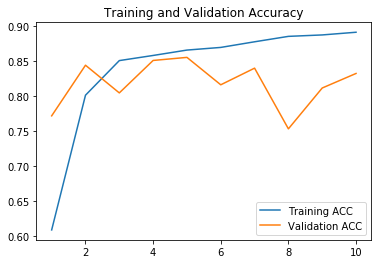

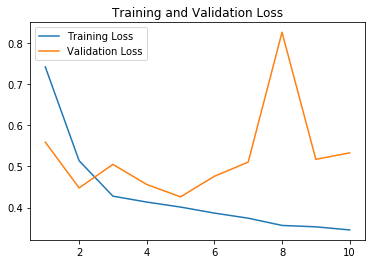

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training ACC')
plt.plot(epochs, val_acc, label='Validation ACC')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()